In [1]:
import torch
from transformers import PatchTSTForPrediction
import numpy as np
import matplotlib.pyplot as plt

# Read BPM values from three text files
bpm_values_cr1 = np.loadtxt(r"data\cr_total.txt")
bpm_values_g = np.loadtxt(r"data\g_total.txt")

# Pad or truncate the sequences to match the model's input length (512)
max_sequence_length = 512
bpm_values_cr1 = torch.tensor(bpm_values_cr1[:max_sequence_length], dtype=torch.float32)
bpm_values_g = torch.tensor(bpm_values_g[:max_sequence_length], dtype=torch.float32)

# Concatenate the values of all three files into a single tensor
input_values = torch.stack([bpm_values_cr1, bpm_values_g], dim=1)  # Shape: [sequence_length, num_channels]

model = PatchTSTForPrediction.from_pretrained("chungimungi/PatchTST-2-input-channels")

# Ensure the model is in evaluation mode
model.eval()

# During inference, one only provides past values, the model outputs future values
with torch.no_grad():
    outputs = model(past_values=input_values.unsqueeze(0))  # Add batch dimension
    prediction_outputs = outputs.prediction_outputs

# Extract predicted future values
predicted_values = prediction_outputs.squeeze(0)  # Remove batch dimension

# Use the values from the code you provided
bpm_values_cr1 = bpm_values_cr1.numpy()
bpm_values_g = bpm_values_g.numpy()
predicted_bpm_cr1 = predicted_values[:, 0].numpy()
predicted_bpm_g = predicted_values[:, 1].numpy()

c:\Users\Ayush\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


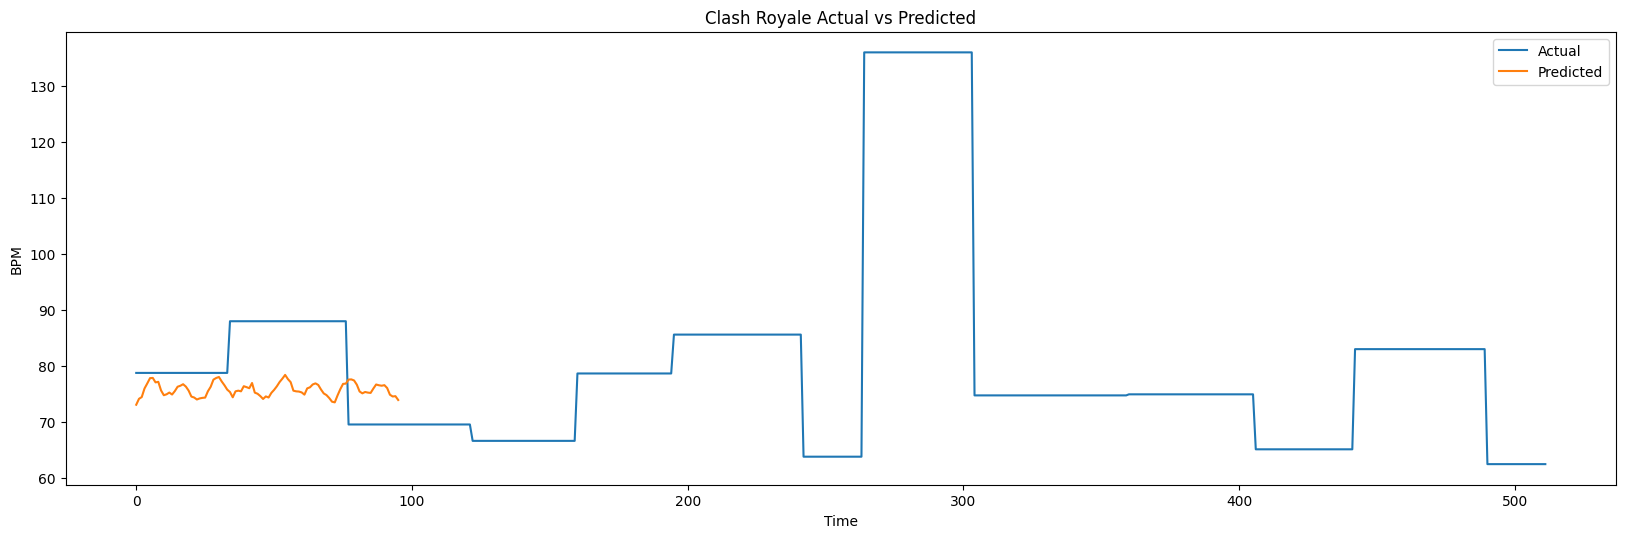

In [2]:

# Create a figure and axis for BPM
plt.figure(figsize=(20, 20))

# Plot BPM for cr1
plt.subplot(311)
plt.plot(bpm_values_cr1, label='Actual')
plt.plot(predicted_bpm_cr1, label='Predicted')
plt.xlabel('Time')
plt.ylabel('BPM')
plt.title('Clash Royale Actual vs Predicted')
plt.legend()


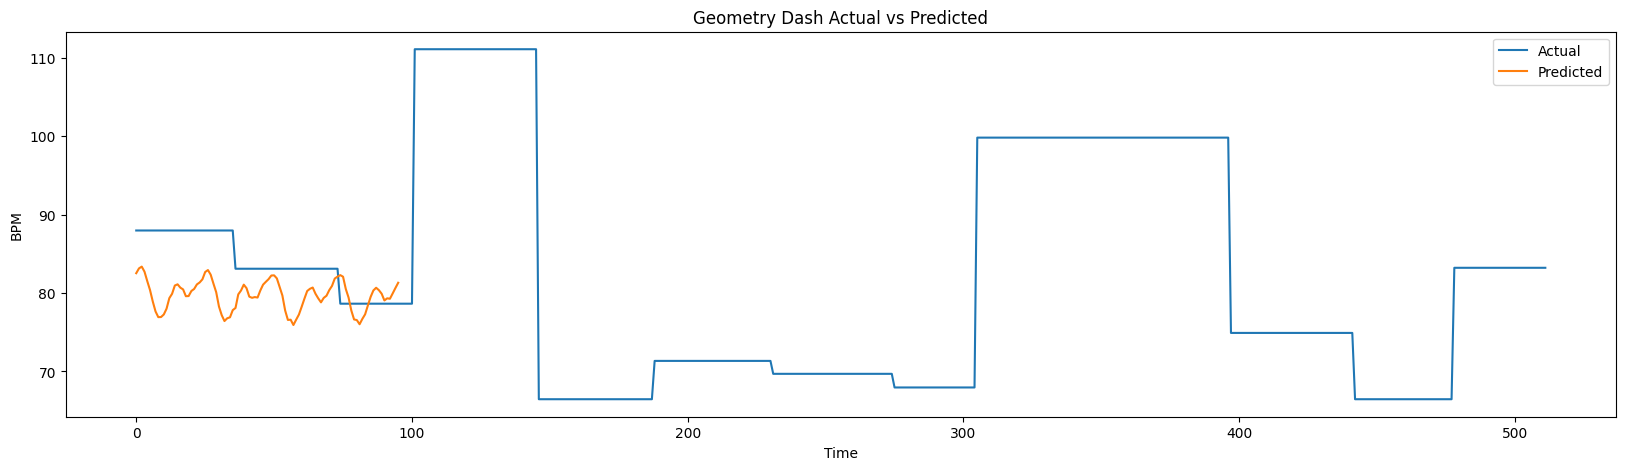

In [3]:
plt.figure(figsize=(20, 20))

# Plot BPM for g
plt.subplot(312)
plt.plot(bpm_values_g, label='Actual')
plt.plot(predicted_bpm_g, label='Predicted')
plt.xlabel('Time')
plt.ylabel('BPM')
plt.title('Geometry Dash Actual vs Predicted')
plt.legend()

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()


In [5]:
import numpy as np

# Define the window size for moving average
window_size = 60

# Calculate the moving average for predicted BPM values
moving_avg_predicted_cr1 = np.convolve(predicted_bpm_cr1, np.ones(window_size)/window_size, mode='valid')
moving_avg_predicted_g = np.convolve(predicted_bpm_g, np.ones(window_size)/window_size, mode='valid')

moving_avg_predicted_cr1 = np.mean(moving_avg_predicted_cr1)
moving_avg_predicted_g = np.mean(moving_avg_predicted_g)

# Print the moving averages and overall averages
print("Moving average BPM for Clash Royale (Predicted):", moving_avg_predicted_cr1)
print("Moving average BPM for Geometry Dash (Predicted):", moving_avg_predicted_g)


Moving average BPM for Clash Royale (Predicted): 75.81311247885765
Moving average BPM for Geometry Dash (Predicted): 79.61512038428505


In [58]:
# evaluate an ARIMA model using a walk-forward validation
import numpy
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = np.loadtxt(r'data\cr_total.txt')
# split into train and test sets
X = series
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions_cr = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions_cr.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions_cr))
print('Test RMSE: %.3f' % rmse)


predicted=93.460000, expected=93.460000
predicted=93.460000, expected=93.460000
predicted=93.460000, expected=93.460000
predicted=93.460000, expected=93.460000
predicted=93.460000, expected=93.460000
predicted=93.460000, expected=93.460000
predicted=93.460000, expected=93.460000
predicted=93.460000, expected=93.460000
predicted=93.460000, expected=93.460000
predicted=93.460000, expected=93.460000
predicted=93.460000, expected=66.520000
predicted=66.519173, expected=66.520000
predicted=66.520000, expected=66.520000
predicted=66.520000, expected=66.520000
predicted=66.520000, expected=66.520000
predicted=66.520000, expected=66.520000
predicted=66.520000, expected=66.520000
predicted=66.520000, expected=66.520000
predicted=66.520000, expected=66.520000
predicted=66.520000, expected=66.520000
predicted=66.520000, expected=66.520000
predicted=66.520000, expected=66.520000
predicted=66.520000, expected=66.520000
predicted=66.520000, expected=66.520000
predicted=66.520000, expected=66.520000


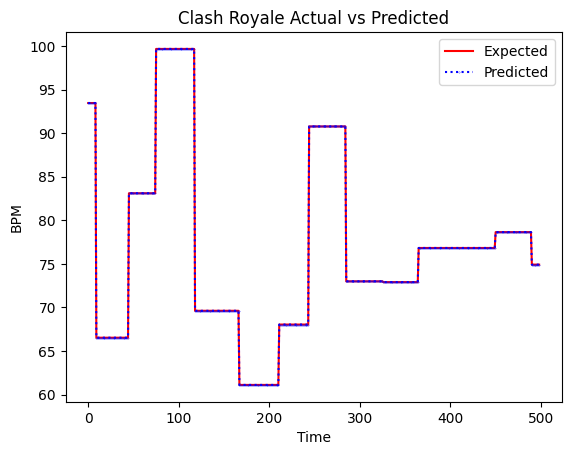

In [59]:
# plot forecasts against actual outcomes
l1, l2 = [], []
l1 = test[1:500]
l2 = predictions_cr[2:501]
pyplot.plot(l1, color = 'red', label = 'Expected')
pyplot.plot(l2, color='blue', linestyle = 'dotted', marker = 'o', markersize = 0.2, label = 'Predicted')
pyplot.xlabel('Time')
pyplot.ylabel('BPM')
pyplot.title('Clash Royale Actual vs Predicted')
pyplot.legend()
pyplot.show()

In [60]:
# evaluate an ARIMA model using a walk-forward validation
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = np.loadtxt(r"data\g_total.txt")
# split into train and test sets
X = series
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions_gd = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions_gd.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions_gd))
print('Test RMSE: %.3f' % rmse)

predicted=115.380000, expected=115.380000
predicted=115.380000, expected=115.380000
predicted=115.380000, expected=115.380000
predicted=115.380000, expected=115.380000
predicted=115.380000, expected=115.380000
predicted=115.380000, expected=115.380000
predicted=115.380000, expected=115.380000
predicted=115.380000, expected=115.380000
predicted=115.380000, expected=115.380000
predicted=115.380000, expected=115.380000
predicted=115.380000, expected=115.380000
predicted=115.380000, expected=115.380000
predicted=115.380000, expected=115.380000
predicted=115.380000, expected=115.380000
predicted=115.380000, expected=115.380000
predicted=115.380000, expected=115.380000
predicted=115.380000, expected=115.380000
predicted=115.380000, expected=115.380000
predicted=115.380000, expected=115.380000
predicted=115.380000, expected=115.380000
predicted=115.380000, expected=115.380000
predicted=115.380000, expected=115.380000
predicted=115.380000, expected=115.380000
predicted=115.380000, expected=99.

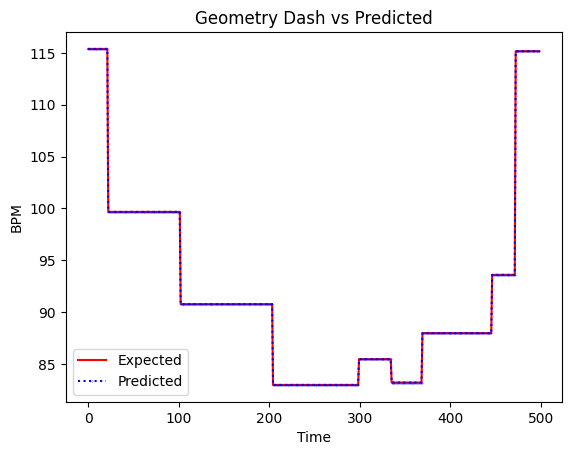

In [61]:
# plot forecasts against actual outcomes
l1, l2 = [], []
l1 = test[1:500]
l2 = predictions_gd[2:501]
pyplot.plot(l1, color = 'red', label = 'Expected')
pyplot.plot(l2, color='blue', linestyle = 'dotted', marker = 'o', markersize = 0.2, label = 'Predicted')
pyplot.xlabel('Time')
pyplot.ylabel('BPM')
pyplot.title('Geometry Dash vs Predicted')
pyplot.legend()
pyplot.show()

In [63]:
import numpy as np

# Define the window size for moving average
window_size = 50

# Calculate the moving average for predicted BPM values
moving_avg_predicted_cr = np.convolve(predictions_cr, np.ones(window_size)/window_size, mode='valid')
moving_avg_predicted_gd = np.convolve(predictions_gd, np.ones(window_size)/window_size, mode='valid')

moving_avg_predicted_cr = np.mean(moving_avg_predicted_cr)
moving_avg_predicted_gd = np.mean(moving_avg_predicted_gd)

# Print the moving averages and overall averages
print("Moving average BPM for Clash Royale (Predicted):", moving_avg_predicted_cr)
print("Moving average BPM for Geometry Dash (Predicted):", moving_avg_predicted_gd)

Moving average BPM for Clash Royale (Predicted): 89.34598889901372
Moving average BPM for Geometry Dash (Predicted): 103.54334327260327
